<a href="https://colab.research.google.com/github/jbae99/CS3091_fits_data/blob/assignment_3/DataSciTopics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
!pip install 'astrodendro'
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
import astrodendro 
from astrodendro import Dendrogram
from astrodendro import DendrogramPlotter
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
data_path = '/content/gdrive/MyDrive/Topics Data/cleanimage.G10.99_Feather_SiO.image.fits'

def createImage(plotData, noiseThresh):
  dataSlice1 = plotData[50,:,:]
  dataSlice2 = plotData[100,:,:]
  data = plotData.sum(axis = 0)
  print(f'Shape of plotted data: {data.shape}')

  
  plt.style.use(astropy_mpl_style)
  fig, axs = plt.subplots(2, 2)
  axs[0,0].imshow(data, cmap = mpl.cm.PuOr, vmin = noiseThresh)
  axs[0,1].hist(data, range = (noiseThresh, data.max()))
  axs[1,0].hist(dataSlice1)
  axs[1,1].hist(dataSlice2)
  plt.show()

def printSummary(data):
  print(f'\nSize: {data.size} \nShape: {data.shape} \nMin: {data.min()} \nMax: {data.max()} \nMean: {np.mean(data)} \nMedian: {np.median(data)} \nStandard Dev: {np.std(data)} \nFifth Percentile: {np.percentile(data, 5)} \nNintieth Percentile: {np.percentile(data, 95)}')

def calcNoise(data):
  resizedData = data[150:200,200:250]
  return np.std(resizedData)

def createAndSaveDendro(data, noiseThresh):
  dendro = Dendrogram.compute(data, min_value = noiseThresh, verbose = True)
  dendro.save_to('/content/gdrive/MyDrive/Topics Data/my_dendro.fits')

  specialDendro = Dendrogram.compute(data, min_value = 2.0, min_delta = 1, min_npix = 10, verbose = True)
  specialDendro.save_to('/content/gdrive/MyDrive/Topics Data/my_special_dendro.fits')


def viewDendro():
  dendro = Dendrogram.load_from('/content/gdrive/MyDrive/Topics Data/my_dendro.fits')
  v = dendro.viewer()
  v.show()

/usr/local/lib/python3.7/dist-packages/astrodendro/viewer.py:95: UserWarning: `WCSAxes` package required for wcs coordinate display.
  warnings.warn("`WCSAxes` package required for wcs coordinate display.")


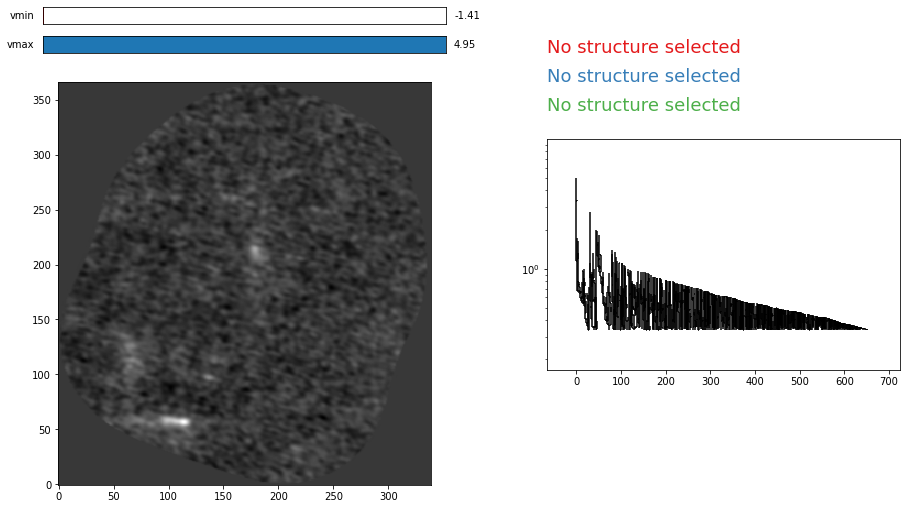

In [7]:
def main():
  
  hdul =   fits.open(data_path)

  ##hdul.info()
  
  ##hdr = hdul[0].header

  ##print(repr(hdr))

  data = hdul[0].data
  data = data.sum(axis = 0)
  
  ##printSummary(data)

  noiseThresh = calcNoise(data)
  
  ##createImage(data, noiseThresh)

  ##createAndSaveDendro(data, noiseThresh)

  viewDendro()

  
if __name__ == "__main__":
  main()